## Importo pandas e DBSCAN

In [2]:
import numpy as np
import pandas as ps
from sklearn import metrics
from sklearn.metrics import *
from sklearn.cluster import DBSCAN

## Importo il dataset e elimino attributi categorici

In [3]:
hr = ps.read_csv('HR_comma_sep.csv')

In [4]:
hr_train = hr.drop(['sales', 'Work_accident', 'left', 'promotion_last_5years','salary'], axis=1)

In [5]:
hr_train.dtypes

satisfaction_level      float64
last_evaluation         float64
number_project            int64
average_montly_hours      int64
time_spend_company        int64
dtype: object

In [6]:
hr_train.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233
std,0.248631,0.171169,1.232592,49.943099,1.460136
min,0.090000,0.360000,2.000000,96.000000,2.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000


# Definizione tabella DBSCAN

In [7]:
from sklearn.preprocessing import StandardScaler

In [8]:
X, y = hr_train.values, hr_train.columns

In [9]:
X = StandardScaler().fit_transform(X)

In [10]:
X

array([[-0.93649469, -1.08727529, -1.46286291, -0.88203988, -0.34123516],
       [ 0.75281433,  0.84070693,  0.97111292,  1.22042276,  1.71343614],
       [-2.02247906,  0.95755433,  2.59376348,  1.4206573 ,  0.34365527],
       ..., 
       [-0.97671633, -1.08727529, -1.46286291, -1.16236823, -0.34123516],
       [-2.02247906,  1.42494396,  1.7824382 ,  1.58084493,  0.34365527],
       [-0.97671633, -1.14569899, -1.46286291, -0.86201642, -0.34123516]])

In [18]:
db = DBSCAN(eps=0.3, min_samples=100).fit(X)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
print ('con eps = 0.3 e min samples 100')
print('Estimated number of clusters: %d' % n_clusters_)
print("Silhouette Coefficient: %0.3f"
      % metrics.silhouette_score(X, labels))


con eps = 0.3 e min samples 100
Estimated number of clusters: 3
Silhouette Coefficient: 0.071


In [25]:
clusters = [X[labels == i] for i in xrange(n_clusters_)]
outliers = X[labels == -1]
clusters

[array([[-0.93649469, -1.08727529, -1.46286291, -0.88203988, -0.34123516],
        [-0.97671633, -1.14569899, -1.46286291, -0.84199297, -0.34123516],
        [-0.81582976, -1.2625464 , -1.46286291, -0.96213369, -0.34123516],
        ..., 
        [-0.97671633, -1.37939381, -1.46286291, -0.82196952, -0.34123516],
        [-0.97671633, -1.08727529, -1.46286291, -1.16236823, -0.34123516],
        [-0.97671633, -1.14569899, -1.46286291, -0.86201642, -0.34123516]]),
 array([[-2.02247906,  0.54858841,  1.7824382 ,  2.08143127,  0.34365527],
        [-2.02247906,  0.66543582,  1.7824382 ,  1.62089183,  0.34365527],
        [-2.0627007 ,  0.66543582,  1.7824382 ,  1.88119673,  0.34365527],
        [-2.0627007 ,  0.431741  ,  1.7824382 ,  1.80110292,  0.34365527],
        [-2.0627007 ,  0.72385952,  1.7824382 ,  1.56082147,  0.34365527],
        [-2.10292235,  0.78228322,  1.7824382 ,  1.76105601,  0.34365527],
        [-2.0627007 ,  0.66543582,  1.7824382 ,  1.82112637,  0.34365527],
        [

In [19]:
hr_train['Cluster']= db.labels_
hr_train.describe().to_csv('dbscan_distribution.csv')


In [23]:
outliers

array([[ 0.75281433,  0.84070693,  0.97111292,  1.22042276,  1.71343614],
       [-2.02247906,  0.95755433,  2.59376348,  1.4206573 ,  0.34365527],
       [ 0.43104118,  0.89913063,  0.97111292,  0.43950807,  1.02854571],
       ..., 
       [ 1.11480912,  0.95755433,  0.97111292,  0.53962534,  1.02854571],
       [ 0.59192776,  0.66543582,  1.7824382 ,  1.84114982,  1.71343614],
       [-2.02247906,  1.42494396,  1.7824382 ,  1.58084493,  0.34365527]])

## Combinazioni

## con eps = 0.1


In [37]:
# Compute DBSCAN
sil_eps_zerouno = []
num_cl_zerouno = []
list_num = [30,40,50,60,70,80,90,100,110,120,130,140,150,160,170]
list_num_inv = [170,160,150,140,130,120,110,100,90,80,70,60,50,40,30]
for num in list_num:
    db = DBSCAN(eps=0.3, min_samples=num).fit(X)
    core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
    core_samples_mask[db.core_sample_indices_] = True
    labels = db.labels_

    # Number of clusters in labels, ignoring noise if present.
    n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
    print ('con eps = 0.1 e min samples %d' % num)
    print('Estimated number of clusters: %d' % n_clusters_)
    print("Silhouette Coefficient: %0.3f"
      % metrics.silhouette_score(X, labels))
    num_cl_zerouno.append(n_clusters_)
    sil_eps_zerouno.append(metrics.silhouette_score(X, labels))

con eps = 0.1 e min samples 30
Estimated number of clusters: 5
Silhouette Coefficient: -0.015
con eps = 0.1 e min samples 40
Estimated number of clusters: 7
Silhouette Coefficient: -0.053
con eps = 0.1 e min samples 50
Estimated number of clusters: 4
Silhouette Coefficient: -0.017
con eps = 0.1 e min samples 60
Estimated number of clusters: 4
Silhouette Coefficient: -0.056
con eps = 0.1 e min samples 70
Estimated number of clusters: 2
Silhouette Coefficient: 0.119
con eps = 0.1 e min samples 80
Estimated number of clusters: 2
Silhouette Coefficient: 0.116
con eps = 0.1 e min samples 90
Estimated number of clusters: 2
Silhouette Coefficient: 0.112
con eps = 0.1 e min samples 100
Estimated number of clusters: 3
Silhouette Coefficient: 0.071
con eps = 0.1 e min samples 110
Estimated number of clusters: 2
Silhouette Coefficient: 0.057
con eps = 0.1 e min samples 120
Estimated number of clusters: 1
Silhouette Coefficient: 0.165
con eps = 0.1 e min samples 130
Estimated number of clusters: 1

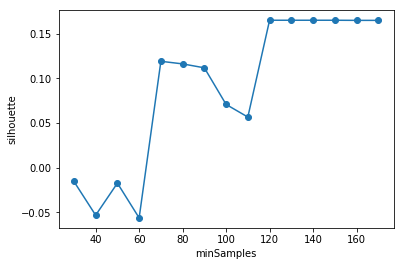

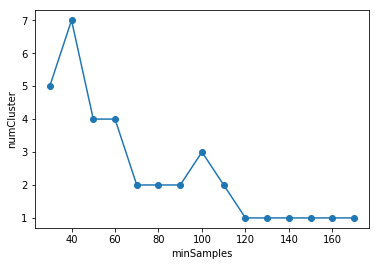

In [38]:
import matplotlib.pyplot as plt 
plt.plot(list_num,sil_eps_zerouno, marker = 'o')
plt.xlabel('minSamples')
plt.ylabel('silhouette')
plt.show()
plt.plot(list_num,num_cl_zerouno, marker = 'o')
plt.xlabel('minSamples')
plt.ylabel('numCluster')
plt.show()

## con eps = 0.2

In [39]:
# Compute DBSCAN
sil_eps_zerodue = []
num_cl_zerodue = []
list_num = [30,40,50,60,70,80,90,100,110,120,130,140,150,160,170]
list_num_inv = [170,160,150,140,130,120,110,100,90,80,70,60,50,40,30]
for num in list_num:
    db = DBSCAN(eps=0.2, min_samples=num).fit(X)
    core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
    core_samples_mask[db.core_sample_indices_] = True
    labels = db.labels_

    # Number of clusters in labels, ignoring noise if present.
    n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
    print ('con eps = 0.2 e min samples %d' % num)
    print('Estimated number of clusters: %d' % n_clusters_)
    print("Silhouette Coefficient: %0.3f"
      % metrics.silhouette_score(X, labels))
    num_cl_zerodue.append(n_clusters_)
    sil_eps_zerodue.append(metrics.silhouette_score(X, labels))
    

con eps = 0.2 e min samples 30
Estimated number of clusters: 3
Silhouette Coefficient: 0.102
con eps = 0.2 e min samples 40
Estimated number of clusters: 2
Silhouette Coefficient: 0.110
con eps = 0.2 e min samples 50
Estimated number of clusters: 4
Silhouette Coefficient: 0.061
con eps = 0.2 e min samples 60
Estimated number of clusters: 2
Silhouette Coefficient: 0.046
con eps = 0.2 e min samples 70
Estimated number of clusters: 1
Silhouette Coefficient: 0.163
con eps = 0.2 e min samples 80
Estimated number of clusters: 1
Silhouette Coefficient: 0.163
con eps = 0.2 e min samples 90
Estimated number of clusters: 1
Silhouette Coefficient: 0.163
con eps = 0.2 e min samples 100
Estimated number of clusters: 1
Silhouette Coefficient: 0.163
con eps = 0.2 e min samples 110
Estimated number of clusters: 1
Silhouette Coefficient: 0.163
con eps = 0.2 e min samples 120
Estimated number of clusters: 1
Silhouette Coefficient: 0.163
con eps = 0.2 e min samples 130
Estimated number of clusters: 1
Sil

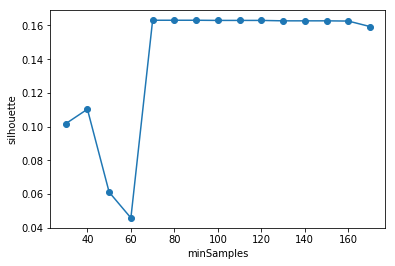

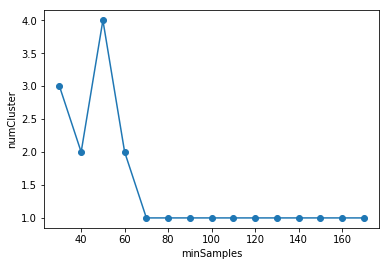

In [41]:
import matplotlib.pyplot as plt 
plt.plot(list_num,sil_eps_zerodue, marker = 'o')
plt.xlabel('minSamples')
plt.ylabel('silhouette')
plt.show()
plt.plot(list_num,num_cl_zerodue, marker = 'o')
plt.xlabel('minSamples')
plt.ylabel('numCluster')
plt.show()

## con eps = 0.3

In [42]:
# Compute DBSCAN
sil_eps_zerotre = []
num_cl_zerotre = []
list_num = [30,40,50,60,70,80,90,100,110,120,130,140,150,160,170]
list_num_inv = [170,160,150,140,130,120,110,100,90,80,70,60,50,40,30]
for num in list_num:
    db = DBSCAN(eps=0.3, min_samples=num).fit(X)
    core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
    core_samples_mask[db.core_sample_indices_] = True
    labels = db.labels_

    # Number of clusters in labels, ignoring noise if present.
    n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
    print ('con eps = 0.3 e min samples %d' % num)
    print('Estimated number of clusters: %d' % n_clusters_)
    print("Silhouette Coefficient: %0.3f"
      % metrics.silhouette_score(X, labels))
    num_cl_zerotre.append(n_clusters_)
    sil_eps_zerotre.append(metrics.silhouette_score(X, labels))
    


con eps = 0.3 e min samples 30
Estimated number of clusters: 5
Silhouette Coefficient: -0.015
con eps = 0.3 e min samples 40
Estimated number of clusters: 7
Silhouette Coefficient: -0.053
con eps = 0.3 e min samples 50
Estimated number of clusters: 4
Silhouette Coefficient: -0.017
con eps = 0.3 e min samples 60
Estimated number of clusters: 4
Silhouette Coefficient: -0.056
con eps = 0.3 e min samples 70
Estimated number of clusters: 2
Silhouette Coefficient: 0.119
con eps = 0.3 e min samples 80
Estimated number of clusters: 2
Silhouette Coefficient: 0.116
con eps = 0.3 e min samples 90
Estimated number of clusters: 2
Silhouette Coefficient: 0.112
con eps = 0.3 e min samples 100
Estimated number of clusters: 3
Silhouette Coefficient: 0.071
con eps = 0.3 e min samples 110
Estimated number of clusters: 2
Silhouette Coefficient: 0.057
con eps = 0.3 e min samples 120
Estimated number of clusters: 1
Silhouette Coefficient: 0.165
con eps = 0.3 e min samples 130
Estimated number of clusters: 1

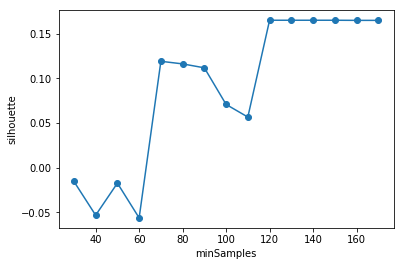

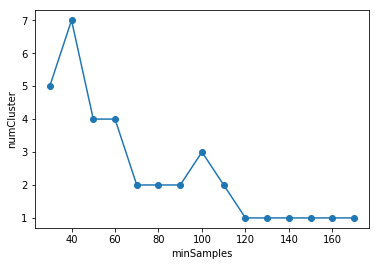

In [66]:
import matplotlib.pyplot as plt 
plt.plot(list_num,sil_eps_zerotre, marker = 'o')
plt.xlabel('minSamples')
plt.ylabel('silhouette')
plt.show()
plt.plot(list_num,num_cl_zerotre, marker = 'o')
plt.xlabel('minSamples')
plt.ylabel('numCluster')
plt.show()

# Con eps = 0.4

In [45]:
# Compute DBSCAN
sil_eps_zeroquattro = []
num_cl_zeroquattro = []
list_num = [30,40,50,60,70,80,90,100,110,120,130,140,150,160,170]
for num in list_num:
    db = DBSCAN(eps=0.4, min_samples=num).fit(X)
    core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
    core_samples_mask[db.core_sample_indices_] = True
    labels = db.labels_

    # Number of clusters in labels, ignoring noise if present.
    n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
    print ('con eps = 0.4 e min samples %d' % num)
    print('Estimated number of clusters: %d' % n_clusters_)
    print("Silhouette Coefficient: %0.3f"
      % metrics.silhouette_score(X, labels))
    sil_eps_zeroquattro.append(metrics.silhouette_score(X, labels))
    num_cl_zeroquattro.append(n_clusters_)

con eps = 0.4 e min samples 30
Estimated number of clusters: 27
Silhouette Coefficient: -0.231
con eps = 0.4 e min samples 40
Estimated number of clusters: 11
Silhouette Coefficient: -0.223
con eps = 0.4 e min samples 50
Estimated number of clusters: 5
Silhouette Coefficient: -0.006
con eps = 0.4 e min samples 60
Estimated number of clusters: 5
Silhouette Coefficient: -0.008
con eps = 0.4 e min samples 70
Estimated number of clusters: 5
Silhouette Coefficient: -0.013
con eps = 0.4 e min samples 80
Estimated number of clusters: 5
Silhouette Coefficient: -0.023
con eps = 0.4 e min samples 90
Estimated number of clusters: 3
Silhouette Coefficient: 0.002
con eps = 0.4 e min samples 100
Estimated number of clusters: 3
Silhouette Coefficient: -0.000
con eps = 0.4 e min samples 110
Estimated number of clusters: 3
Silhouette Coefficient: -0.015
con eps = 0.4 e min samples 120
Estimated number of clusters: 2
Silhouette Coefficient: 0.121
con eps = 0.4 e min samples 130
Estimated number of clust

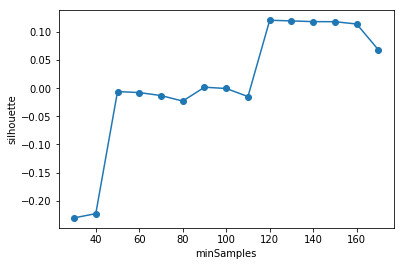

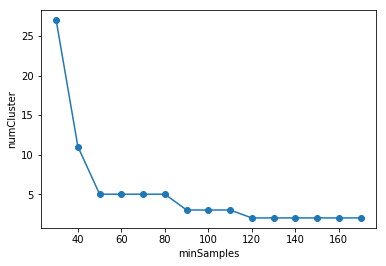

In [46]:
import matplotlib.pyplot as plt 
plt.plot(list_num,sil_eps_zeroquattro, marker = 'o')
plt.xlabel('minSamples')
plt.ylabel('silhouette')
plt.show()
plt.plot(list_num,num_cl_zeroquattro, marker = 'o')
plt.xlabel('minSamples')
plt.ylabel('numCluster')
plt.show()

## con eps = 0.5

In [47]:
# Compute DBSCAN
sil_eps_zerocinque = []
num_cl_zerocinque = []
list_num = [30,40,50,60,70,80,90,100,110,120,130,140,150,160,170]
for num in list_num:
    db = DBSCAN(eps=0.5, min_samples=num).fit(X)
    core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
    core_samples_mask[db.core_sample_indices_] = True
    labels = db.labels_

    # Number of clusters in labels, ignoring noise if present.
    n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
    print ('con eps = 0.5 e min samples %d' % num)
    print('Estimated number of clusters: %d' % n_clusters_)
    print("Silhouette Coefficient: %0.3f"
      % metrics.silhouette_score(X, labels))
    sil_eps_zerocinque.append(metrics.silhouette_score(X, labels))
    num_cl_zerocinque.append(n_clusters_)

con eps = 0.5 e min samples 30
Estimated number of clusters: 17
Silhouette Coefficient: -0.077
con eps = 0.5 e min samples 40
Estimated number of clusters: 16
Silhouette Coefficient: -0.152
con eps = 0.5 e min samples 50
Estimated number of clusters: 12
Silhouette Coefficient: -0.162
con eps = 0.5 e min samples 60
Estimated number of clusters: 9
Silhouette Coefficient: -0.175
con eps = 0.5 e min samples 70
Estimated number of clusters: 6
Silhouette Coefficient: -0.118
con eps = 0.5 e min samples 80
Estimated number of clusters: 5
Silhouette Coefficient: -0.002
con eps = 0.5 e min samples 90
Estimated number of clusters: 5
Silhouette Coefficient: -0.002
con eps = 0.5 e min samples 100
Estimated number of clusters: 5
Silhouette Coefficient: -0.005
con eps = 0.5 e min samples 110
Estimated number of clusters: 5
Silhouette Coefficient: -0.010
con eps = 0.5 e min samples 120
Estimated number of clusters: 4
Silhouette Coefficient: -0.011
con eps = 0.5 e min samples 130
Estimated number of cl

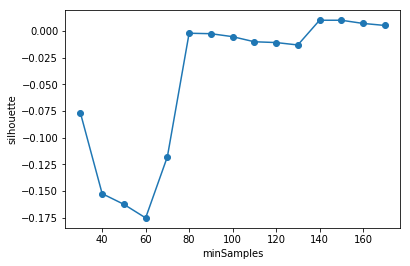

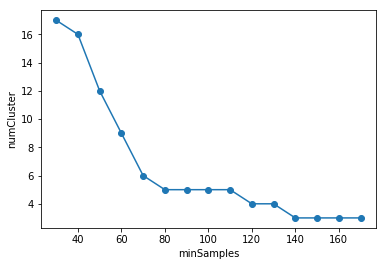

In [48]:
import matplotlib.pyplot as plt 
plt.plot(list_num,sil_eps_zerocinque, marker = 'o')
plt.xlabel('minSamples')
plt.ylabel('silhouette')
plt.show()
plt.plot(list_num,num_cl_zerocinque, marker = 'o')
plt.xlabel('minSamples')
plt.ylabel('numCluster')
plt.show()

## con eps = 0.6

In [49]:
# Compute DBSCAN
sil_eps_zerosei = []
num_cl_zerosei = []
list_num = [30,40,50,60,70,80,90,100,110,120,130,140,150,160,170]
for num in list_num:
    db = DBSCAN(eps=0.6, min_samples=num).fit(X)
    core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
    core_samples_mask[db.core_sample_indices_] = True
    labels = db.labels_

    # Number of clusters in labels, ignoring noise if present.
    n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
    print ('con eps = 0.6 e min samples %d' % num)
    print('Estimated number of clusters: %d' % n_clusters_)
    print("Silhouette Coefficient: %0.3f"
      % metrics.silhouette_score(X, labels))
    sil_eps_zerosei.append(metrics.silhouette_score(X, labels))
    num_cl_zerosei.append(n_clusters_)

con eps = 0.6 e min samples 30
Estimated number of clusters: 20
Silhouette Coefficient: -0.076
con eps = 0.6 e min samples 40
Estimated number of clusters: 15
Silhouette Coefficient: -0.037
con eps = 0.6 e min samples 50
Estimated number of clusters: 14
Silhouette Coefficient: -0.064
con eps = 0.6 e min samples 60
Estimated number of clusters: 12
Silhouette Coefficient: -0.092
con eps = 0.6 e min samples 70
Estimated number of clusters: 10
Silhouette Coefficient: -0.092
con eps = 0.6 e min samples 80
Estimated number of clusters: 8
Silhouette Coefficient: -0.086
con eps = 0.6 e min samples 90
Estimated number of clusters: 9
Silhouette Coefficient: -0.133
con eps = 0.6 e min samples 100
Estimated number of clusters: 8
Silhouette Coefficient: -0.145
con eps = 0.6 e min samples 110
Estimated number of clusters: 7
Silhouette Coefficient: -0.154
con eps = 0.6 e min samples 120
Estimated number of clusters: 6
Silhouette Coefficient: -0.122
con eps = 0.6 e min samples 130
Estimated number of 

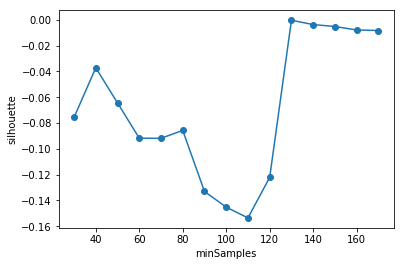

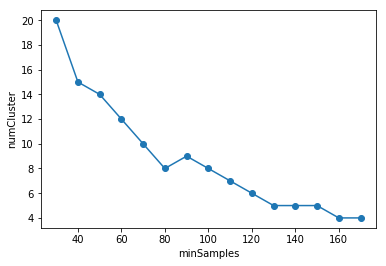

In [50]:
import matplotlib.pyplot as plt 
plt.plot(list_num,sil_eps_zerosei, marker = 'o')
plt.xlabel('minSamples')
plt.ylabel('silhouette')
plt.show()
plt.plot(list_num,num_cl_zerosei, marker = 'o')
plt.xlabel('minSamples')
plt.ylabel('numCluster')
plt.show()

## con eps = 0.7

In [51]:
# Compute DBSCAN
sil_eps_zerosette = []
num_cl_zerosette = []
list_num = [30,40,50,60,70,80,90,100,110,120,130,140,150,160,170]
for num in list_num:
    db = DBSCAN(eps=0.7, min_samples=num).fit(X)
    core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
    core_samples_mask[db.core_sample_indices_] = True
    labels = db.labels_

    # Number of clusters in labels, ignoring noise if present.
    n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
    print ('con eps = 0.5 e min samples %d' % num)
    print('Estimated number of clusters: %d' % n_clusters_)
    print("Silhouette Coefficient: %0.3f"
      % metrics.silhouette_score(X, labels))
    sil_eps_zerosette.append(metrics.silhouette_score(X, labels))
    num_cl_zerosette.append(n_clusters_)

con eps = 0.5 e min samples 30
Estimated number of clusters: 7
Silhouette Coefficient: 0.078
con eps = 0.5 e min samples 40
Estimated number of clusters: 8
Silhouette Coefficient: 0.064
con eps = 0.5 e min samples 50
Estimated number of clusters: 8
Silhouette Coefficient: 0.053
con eps = 0.5 e min samples 60
Estimated number of clusters: 8
Silhouette Coefficient: 0.040
con eps = 0.5 e min samples 70
Estimated number of clusters: 8
Silhouette Coefficient: 0.024
con eps = 0.5 e min samples 80
Estimated number of clusters: 9
Silhouette Coefficient: -0.035
con eps = 0.5 e min samples 90
Estimated number of clusters: 7
Silhouette Coefficient: 0.013
con eps = 0.5 e min samples 100
Estimated number of clusters: 7
Silhouette Coefficient: -0.000
con eps = 0.5 e min samples 110
Estimated number of clusters: 7
Silhouette Coefficient: -0.014
con eps = 0.5 e min samples 120
Estimated number of clusters: 7
Silhouette Coefficient: -0.024
con eps = 0.5 e min samples 130
Estimated number of clusters: 7

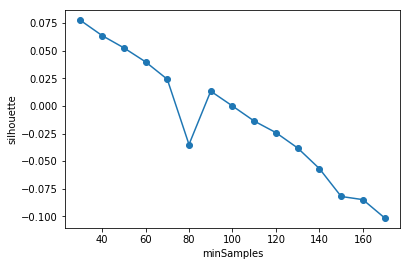

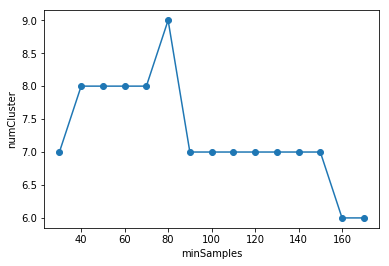

In [52]:
import matplotlib.pyplot as plt 
plt.plot(list_num,sil_eps_zerosette, marker = 'o')
plt.xlabel('minSamples')
plt.ylabel('silhouette')
plt.show()
plt.plot(list_num,num_cl_zerosette, marker = 'o')
plt.xlabel('minSamples')
plt.ylabel('numCluster')
plt.show()

## con eps = 0.8

In [53]:
# Compute DBSCAN
sil_eps_zerootto = []
num_cl_zerootto = []
list_num = [30,40,50,60,70,80,90,100,110,120,130,140,150,160,170]
for num in list_num:
    db = DBSCAN(eps=0.8, min_samples=num).fit(X)
    core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
    core_samples_mask[db.core_sample_indices_] = True
    labels = db.labels_

    # Number of clusters in labels, ignoring noise if present.
    n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
    print ('con eps = 0.8 e min samples %d' % num)
    print('Estimated number of clusters: %d' % n_clusters_)
    print("Silhouette Coefficient: %0.3f"
      % metrics.silhouette_score(X, labels))
    sil_eps_zerootto.append(metrics.silhouette_score(X, labels))
    num_cl_zerootto.append(n_clusters_)

con eps = 0.8 e min samples 30
Estimated number of clusters: 7
Silhouette Coefficient: 0.086
con eps = 0.8 e min samples 40
Estimated number of clusters: 7
Silhouette Coefficient: 0.087
con eps = 0.8 e min samples 50
Estimated number of clusters: 7
Silhouette Coefficient: 0.085
con eps = 0.8 e min samples 60
Estimated number of clusters: 6
Silhouette Coefficient: 0.088
con eps = 0.8 e min samples 70
Estimated number of clusters: 6
Silhouette Coefficient: 0.086
con eps = 0.8 e min samples 80
Estimated number of clusters: 6
Silhouette Coefficient: 0.082
con eps = 0.8 e min samples 90
Estimated number of clusters: 6
Silhouette Coefficient: 0.078
con eps = 0.8 e min samples 100
Estimated number of clusters: 6
Silhouette Coefficient: 0.072
con eps = 0.8 e min samples 110
Estimated number of clusters: 6
Silhouette Coefficient: 0.067
con eps = 0.8 e min samples 120
Estimated number of clusters: 7
Silhouette Coefficient: 0.016
con eps = 0.8 e min samples 130
Estimated number of clusters: 8
Sil

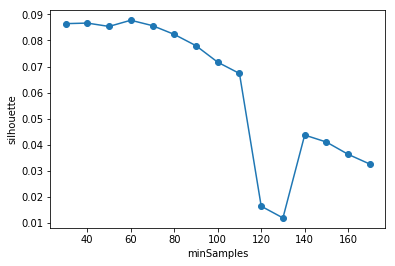

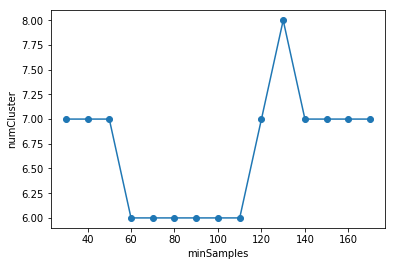

In [54]:
import matplotlib.pyplot as plt 
plt.plot(list_num,sil_eps_zerootto, marker = 'o')
plt.xlabel('minSamples')
plt.ylabel('silhouette')
plt.show()
plt.plot(list_num,num_cl_zerootto, marker = 'o')
plt.xlabel('minSamples')
plt.ylabel('numCluster')
plt.show()

## con eps = 0.9

In [55]:
# Compute DBSCAN
sil_eps_zeronove = []
num_cl_zeronove = []
list_num = [30,40,50,60,70,80,90,100,110,120,130,140,150,160,170]
for num in list_num:
    db = DBSCAN(eps=0.9, min_samples=num).fit(X)
    core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
    core_samples_mask[db.core_sample_indices_] = True
    labels = db.labels_

    # Number of clusters in labels, ignoring noise if present.
    n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
    print ('con eps = 0.9 e min samples %d' % num)
    print('Estimated number of clusters: %d' % n_clusters_)
    print("Silhouette Coefficient: %0.3f"
      % metrics.silhouette_score(X, labels))
    sil_eps_zeronove.append(metrics.silhouette_score(X, labels))
    num_cl_zeronove.append(n_clusters_)

con eps = 0.9 e min samples 30
Estimated number of clusters: 1
Silhouette Coefficient: 0.265
con eps = 0.9 e min samples 40
Estimated number of clusters: 4
Silhouette Coefficient: 0.163
con eps = 0.9 e min samples 50
Estimated number of clusters: 2
Silhouette Coefficient: 0.279
con eps = 0.9 e min samples 60
Estimated number of clusters: 2
Silhouette Coefficient: 0.277
con eps = 0.9 e min samples 70
Estimated number of clusters: 2
Silhouette Coefficient: 0.276
con eps = 0.9 e min samples 80
Estimated number of clusters: 2
Silhouette Coefficient: 0.274
con eps = 0.9 e min samples 90
Estimated number of clusters: 2
Silhouette Coefficient: 0.270
con eps = 0.9 e min samples 100
Estimated number of clusters: 2
Silhouette Coefficient: 0.267
con eps = 0.9 e min samples 110
Estimated number of clusters: 2
Silhouette Coefficient: 0.265
con eps = 0.9 e min samples 120
Estimated number of clusters: 2
Silhouette Coefficient: 0.263
con eps = 0.9 e min samples 130
Estimated number of clusters: 2
Sil

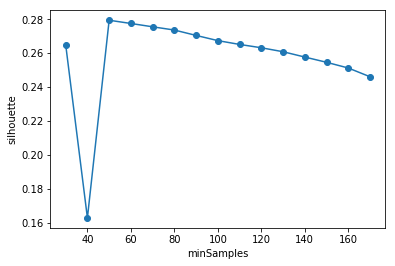

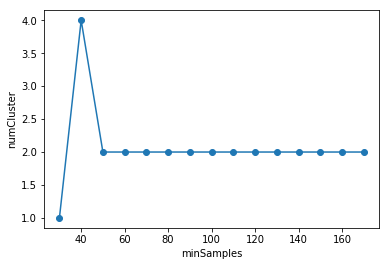

In [56]:
import matplotlib.pyplot as plt 
plt.plot(list_num,sil_eps_zeronove, marker = 'o')
plt.xlabel('minSamples')
plt.ylabel('silhouette')
plt.show()
plt.plot(list_num,num_cl_zeronove, marker = 'o')
plt.xlabel('minSamples')
plt.ylabel('numCluster')
plt.show()

# GRAFICI FINALI PER SCELTA PARAMETRI

## CLUSTER

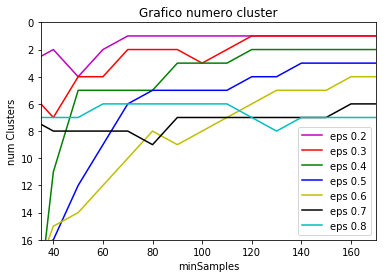

In [59]:
from matplotlib.pyplot import axis
plt.plot(list_num, num_cl_zerodue, 'm',label = 'eps 0.2')        # Usa pylab per tracciare con  x2,y2
plt.plot(list_num, num_cl_zerotre, 'r',label = 'eps 0.3')        # Usa pylab per tracciare con  x1,y1
plt.plot(list_num, num_cl_zeroquattro, 'g',label = 'eps 0.4')        # Usa pylab per tracciare con  x2,y2
plt.plot(list_num, num_cl_zerocinque, 'b',label = 'eps 0.5')        # Usa pylab per tracciare con  x2,y2
plt.plot(list_num, num_cl_zerosei, 'y',label = 'eps 0.6')        # Usa pylab per tracciare con  x1,y1
plt.plot(list_num, num_cl_zerosette, 'k',label = 'eps 0.7')        # Usa pylab per tracciare con  x2,y2
plt.plot(list_num, num_cl_zerootto, 'c',label = 'eps 0.8')        # Usa pylab per tracciare con  x2,y2
plt.title('Grafico numero cluster')     # Titolo del grafico
plt.xlabel('minSamples')         # Nomi degli assi
plt.ylabel('num Clusters')
plt.legend()
axis([35,170,16,0])

plt.show()                   # Mostra il risultato sullo schermo

## SILHOUETTE

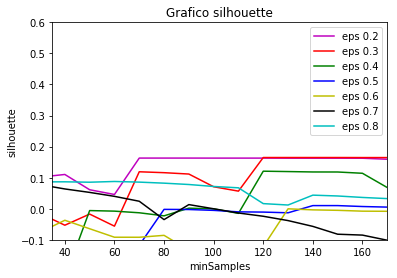

AttributeError: 'module' object has no attribute 'latex'

In [71]:

plt.plot(list_num, sil_eps_zerodue, 'm',label = 'eps 0.2')        # Usa pylab per tracciare con  x2,y2
plt.plot(list_num, sil_eps_zerotre, 'r',label = 'eps 0.3')        # Usa pylab per tracciare con  x1,y1
plt.plot(list_num, sil_eps_zeroquattro, 'g',label = 'eps 0.4')        # Usa pylab per tracciare con  x2,y2
plt.plot(list_num, sil_eps_zerocinque, 'b',label = 'eps 0.5')        # Usa pylab per tracciare con  x2,y2
plt.plot(list_num, sil_eps_zerosei, 'y',label = 'eps 0.6')        # Usa pylab per tracciare con  x1,y1
plt.plot(list_num, sil_eps_zerosette, 'k',label = 'eps 0.7')        # Usa pylab per tracciare con  x2,y2
plt.plot(list_num, sil_eps_zerootto, 'c',label = 'eps 0.8')        # Usa pylab per tracciare con  x2,y2
plt.title('Grafico silhouette')     # Titolo del grafico
plt.xlabel('minSamples')         # Nomi degli assi
plt.ylabel('silhouette')
plt.legend()
plt.xlim(35)
plt.axis([35,170,-0.1,0.6])
plt.show()                   # Mostra il risultato sullo schermo